### Instalación de las librerias faltantes


In [ ]:
#%pip install lazypredict

### Conexión al drive del usuario



In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


### Importar Librerias:
Esta celda importa las librerías necesarias para el análisis de datos y modelado.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

#warnings.filterwarnings("ignore")


### Carga del dataset

In [ ]:
car_df = pd.read_csv('/content/content/MyDrive/Sample_Data/car_data.csv')


Esta celda realiza operaciones adicionales de análisis o procesamiento de datos.


In [ ]:
car_df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.00,2.50,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.00,2.50,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.00,2.50,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.00,2.00,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.00,2.00,fwd,gas,32,mazda,cx-5 2wd,a,2014


### Estadísticas:
Esta celda genera estadísticas descriptivas para las variables numéricas en el dataset.


In [ ]:
car_df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.00,550.00,548.00,548.00,550.00,550.00
mean,21.46,24.07,5.32,2.93,28.61,2019.00
std,8.15,7.48,1.76,1.25,6.83,3.17
min,11.00,14.00,3.00,1.20,18.00,2014.00
25%,17.00,20.00,4.00,2.00,24.00,2016.00
50%,20.00,23.00,4.00,2.50,28.00,2019.00
75%,24.00,27.00,6.00,3.50,32.00,2022.00
max,126.00,112.00,12.00,6.80,102.00,2024.00



Esta celda muestra información general sobre el dataset, incluyendo tipos de datos y valores nulos.


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


### Verificar la existencia de datos nulos:
Esta celda cuenta los valores nulos en cada columna del dataset.


In [ ]:
car_df.isnull().sum()

,0
city_mpg,0
class,0
combination_mpg,0
cylinders,2
displacement,2
drive,0
fuel_type,0
highway_mpg,0
make,0
model,0


### Copia del dataset original

In [ ]:
car_df_copy = car_df.copy()

### Eliminación de registros nulos


In [ ]:
car_df_copy = car_df_copy.dropna()

En el siguiente paso nos aseguramos de que los registros nulos hayan sido eliminados


In [ ]:
car_df_copy.isnull().sum()

,0
city_mpg,0
class,0
combination_mpg,0
cylinders,0
displacement,0
drive,0
fuel_type,0
highway_mpg,0
make,0
model,0


### Codificación de variables categóricas en el dataset

Este bloque de código transforma las columnas categóricas en el dataset en valores numéricos utilizando `LabelEncoder`. A continuación se detalla cada paso:

1. **Definir las columnas a codificar**: La lista `columns_to_encode` contiene los nombres de las columnas categóricas (`fuel_type`, `class`, `drive`, `make`, `model`, y `transmission`) que se transformarán a valores numéricos.
2. **Inicializar un diccionario para almacenar los codificadores**: `label_encoders` se utiliza para guardar cada `LabelEncoder` aplicado a una columna. Esto permite acceder a estos codificadores posteriormente si es necesario revertir o analizar las codificaciones.
3. **Aplicar `LabelEncoder` a cada columna**:
   - Para cada columna en `columns_to_encode`, se crea un objeto `LabelEncoder` y se ajusta a los valores únicos de esa columna.
   - La columna codificada resultante se añade al dataset con el sufijo `_encoded`.
   - El codificador se almacena en el diccionario `label_encoders` para su posible uso posterior.
4. **Eliminar las columnas originales**: Se eliminan las columnas categóricas originales, dejando solo las versiones codificadas en `car_df_encoded`.
5. **Mostrar el resultado**: Se muestra una vista previa de `car_df_encoded` con las columnas codificadas.

Este proceso facilita el uso de variables categóricas en modelos de machine learning que requieren valores numéricos.


In [ ]:
columns_to_encode = ['fuel_type', 'class', 'drive', 'make', 'model', 'transmission']

label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    car_df_copy[col + '_encoded'] = le.fit_transform(car_df_copy[col])
    label_encoders[col] = le

car_df_encoded = car_df_copy.drop(columns=columns_to_encode)
car_df_encoded.head()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year,fuel_type_encoded,class_encoded,drive_encoded,make_encoded,model_encoded,transmission_encoded
0,25,29,4.00,2.50,36,2014,1,2,2,19,15,1
1,26,30,4.00,2.50,37,2014,1,2,2,19,15,0
2,25,27,4.00,2.50,31,2014,1,7,2,19,74,0
3,26,29,4.00,2.00,34,2014,1,7,2,19,74,1
4,26,28,4.00,2.00,32,2014,1,7,2,19,74,0


### Generación del mapa de calor de la matriz de correlación

Este bloque de código calcula y visualiza la matriz de correlación entre las variables numéricas en el dataset codificado (`car_df_encoded`):

1. **Calcular la matriz de correlación**: Se utiliza `corr()` para calcular la correlación entre todas las variables numéricas en `car_df_encoded`. Esto proporciona una matriz donde cada valor representa el grado de correlación entre dos variables.
2. **Configurar la visualización**:
   - Se crea una figura de tamaño 10x10 para el gráfico de mapa de calor.
   - Se utiliza `sns.heatmap` de Seaborn para generar el mapa de calor, aplicando la siguiente configuración:
     - `corr`: la matriz de correlación calculada.
     - `annot=True`: muestra los valores de correlación en cada celda del mapa.
     - `cmap='coolwarm'`: utiliza una escala de colores que va de tonos fríos a cálidos, facilitando la interpretación de la intensidad de las correlaciones.
     - `linewidths=.5`: añade un pequeño espacio entre las celdas para mejorar la claridad visual.
3. **Mostrar el gráfico**: Finalmente, se muestra el mapa de calor, permitiendo identificar visualmente las relaciones entre variables y detectar posibles multicolinealidades en el dataset.

Este análisis ayuda a entender cómo las variables están relacionadas entre sí, lo cual es valioso para la selección de características y el diseño de modelos.


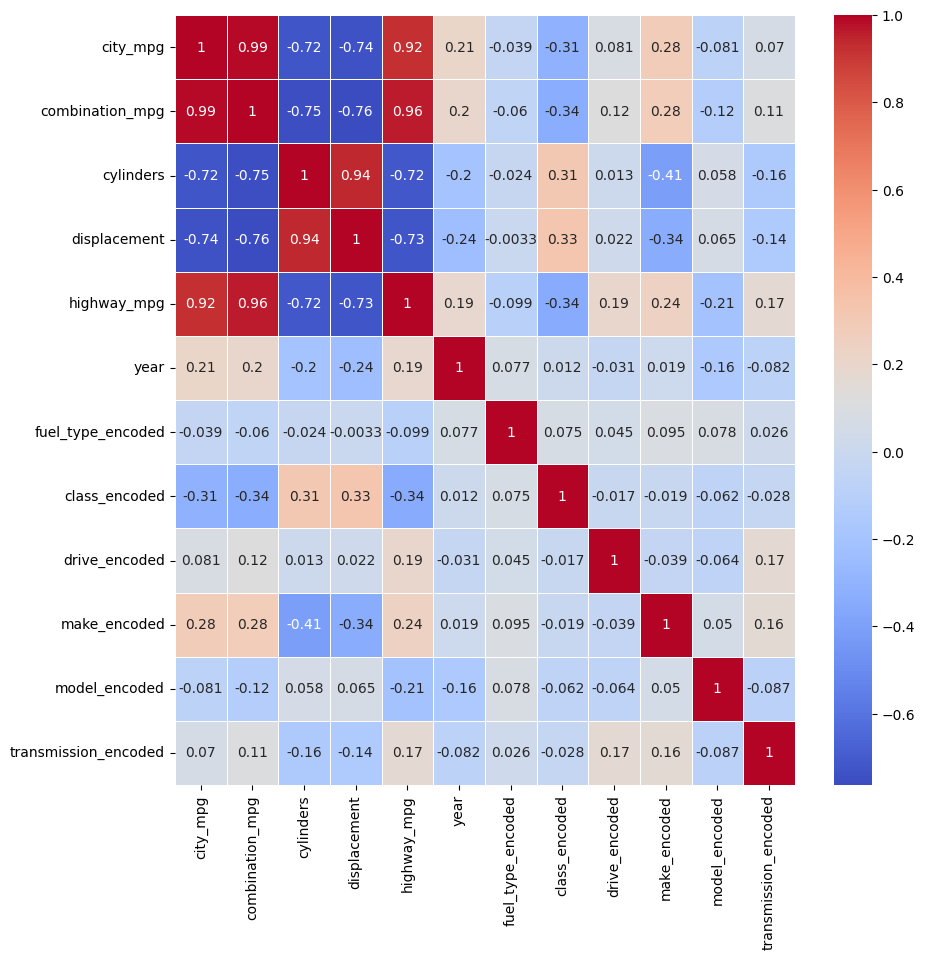

In [ ]:
corr = car_df_encoded.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot= True, cmap='coolwarm',linewidths=.5, ax=ax)
plt.show()

### Selección de características y variable objetivo para el modelo

Este bloque de código define las variables independientes (características) y la variable dependiente (objetivo) que se utilizarán en el modelo de machine learning:

1. **Definir las características (`features`)**: Se seleccionan las columnas que servirán como variables independientes en el modelo. Estas incluyen:
   - `fuel_type_encoded`, `class_encoded`, `drive_encoded`, `transmission_encoded`: versiones codificadas de variables categóricas.
   - `cylinders` y `displacement`: variables numéricas que describen características físicas de los vehículos.

2. **Asignar las características a `X`**: El DataFrame `X` contiene únicamente las columnas especificadas en `features`, que representarán las entradas del modelo.

3. **Definir la variable objetivo (`y`)**: Se asigna `combination_mpg` a `y`, que representa la eficiencia de combustible (millas por galón) combinada del vehículo. Esta será la variable que el modelo intentará predecir.

Este paso prepara los datos para la fase de entrenamiento y ajuste del modelo, organizando las características y el objetivo de manera que puedan ser utilizados en algoritmos de machine learning.


In [ ]:
features = ['fuel_type_encoded', 'class_encoded', 'drive_encoded',
           'transmission_encoded', 'cylinders', 'displacement']

X = car_df_encoded[features]
y = car_df_encoded['combination_mpg']

# Linear regression

### División de los datos en conjuntos de entrenamiento y prueba

Este bloque de código separa los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo de manera efectiva:

1. **División de los datos**: Utilizando `train_test_split` de `sklearn.model_selection`, se divide el conjunto de datos en:
   - `X_train` y `y_train`: conjunto de entrenamiento, que contiene el 80% de los datos, utilizado para ajustar el modelo.
   - `X_test` y `y_test`: conjunto de prueba, que contiene el 20% de los datos, utilizado para evaluar el modelo después del entrenamiento.

2. **Parámetros**:
   - `test_size=0.2`: indica que el 20% de los datos se reservarán para el conjunto de prueba.
   - `random_state=42`: establece una semilla para asegurar que la división sea reproducible, permitiendo obtener la misma partición cada vez que se ejecuta el código.

Esta división es crucial para medir el rendimiento del modelo en datos no vistos y evitar el sobreajuste, asegurando que las evaluaciones reflejen la capacidad del modelo para generalizar.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento del modelo de regresión lineal

Este bloque de código crea y entrena un modelo de regresión lineal:

1. **Inicializar el modelo**: Se instancia un modelo de `LinearRegression` de `sklearn.linear_model`.
2. **Entrenar el modelo**: Utilizando `model.fit(X_train, y_train)`, el modelo ajusta los parámetros para minimizar el error en el conjunto de entrenamiento, aprendiendo la relación entre las características (`X_train`) y la variable objetivo (`y_train`).

Este modelo ahora puede usarse para hacer predicciones sobre datos nuevos basándose en las relaciones aprendidas.


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Generación de predicciones con el modelo entrenado

Este bloque de código utiliza el modelo de regresión lineal entrenado para hacer predicciones:

1. **Generar predicciones**: Con `model.predict(X_test)`, el modelo aplica el conocimiento adquirido durante el entrenamiento para predecir los valores de `y` en el conjunto de prueba (`X_test`).
2. **Guardar las predicciones**: Las predicciones resultantes se almacenan en `y_pred`, representando las estimaciones de la variable objetivo para cada entrada en `X_test`.

Estas predicciones se utilizarán posteriormente para evaluar el rendimiento del modelo comparándolas con los valores reales.


In [ ]:
y_pred = model.predict(X_test)

### Evaluación del rendimiento del modelo y análisis de los coeficientes

Este bloque de código calcula varias métricas de evaluación para el modelo de regresión lineal y analiza sus coeficientes:

1. **Calcular el Error Cuadrático Medio (MSE)**: `mean_squared_error(y_test, y_pred)` calcula el MSE, que mide el promedio de los errores al cuadrado entre las predicciones y los valores reales en el conjunto de prueba. Un valor menor de MSE indica un mejor ajuste del modelo.
   
2. **Calcular el Coeficiente de Determinación (R²)**: `r2_score(y_test, y_pred)` calcula el R², que representa la proporción de varianza en la variable objetivo explicada por las características. Un valor cercano a 1 indica un modelo bien ajustado.

3. **Calcular el Error Absoluto Medio (MAE)**: `mean_absolute_error(y_test, y_pred)` obtiene el MAE, que mide el promedio de las diferencias absolutas entre las predicciones y los valores reales, proporcionando una interpretación fácil de los errores promedio.

4. **Extraer los coeficientes e intercepto del modelo**:
   - `model.coef_` almacena los coeficientes de cada característica, indicando la influencia de cada variable en la predicción.
   - `model.intercept_` es el valor de intersección o punto de partida del modelo cuando todas las características son cero.

Estas métricas y parámetros ayudan a evaluar la precisión del modelo y a interpretar la influencia de cada característica en las predicciones.



In [ ]:
# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

mse

10.452244741213496

In [ ]:
r2

0.6103465401980328

In [ ]:
coefficients

array([-5.95330628, -0.10156996,  0.75996326, -0.40913694, -0.90402612,
       -1.96967241])

In [ ]:
intercept

39.72556563491297

### Visualización de Valores Reales vs. Predicciones

Este bloque de código genera un gráfico de dispersión que compara los valores reales de `combination_mpg` en el conjunto de prueba con los valores predichos por el modelo. La línea roja diagonal indica una predicción perfecta, lo que permite evaluar visualmente la precisión del modelo.


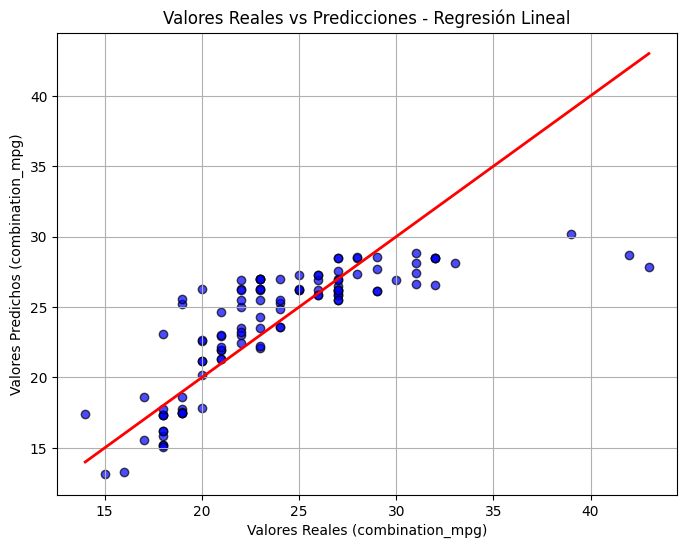

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Valores Reales (combination_mpg)')
plt.ylabel('Valores Predichos (combination_mpg)')
plt.title('Valores Reales vs Predicciones - Regresión Lineal')
plt.grid(True)
plt.show()

# Random Forest Regressor

In [ ]:
features = ['fuel_type_encoded', 'class_encoded', 'drive_encoded',
           'transmission_encoded', 'cylinders', 'displacement']

X = car_df_encoded[features]
y = car_df_encoded['combination_mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y evaluación del modelo de Bosque Aleatorio

Este bloque de código crea, entrena y evalúa un modelo de regresión utilizando el algoritmo de Bosque Aleatorio:

1. **Inicialización del modelo**: `RandomForestRegressor` se instancia con 100 árboles (`n_estimators = 100`) y una semilla fija (`random_state = 42`) para reproducibilidad.
2. **Entrenamiento del modelo**: `rf_model.fit(X_train, y_train)` ajusta el modelo a los datos de entrenamiento.
3. **Predicción**: `rf_model.predict(X_test)` genera predicciones para el conjunto de prueba, almacenadas en `y_pred_rf`.
4. **Evaluación (MSE)**: `mean_squared_error(y_test, y_pred_rf)` calcula el MSE para el modelo de Bosque Aleatorio, guardando el resultado en `mse_rf`.

Este MSE permite comparar la precisión del modelo de Bosque Aleatorio con la de otros modelos, como la regresión lineal.


In [ ]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42 )
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

4.4305981944016555

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.6103465401980328

In [ ]:
coefficients = rf_model.feature_importances_
coefficients

array([0.0098201 , 0.07865102, 0.06729837, 0.02455211, 0.4621765 ,
       0.35750189])

### Visualización de Valores Reales vs. Predicciones para el Modelo de Bosque Aleatorio

Este bloque de código genera un gráfico de dispersión que compara los valores reales de `combination_mpg` en el conjunto de prueba con los valores predichos por el modelo de Bosque Aleatorio (`RandomForestRegressor`). La línea roja diagonal representa una predicción perfecta, ayudando a evaluar visualmente el rendimiento del modelo en comparación con los valores reales.


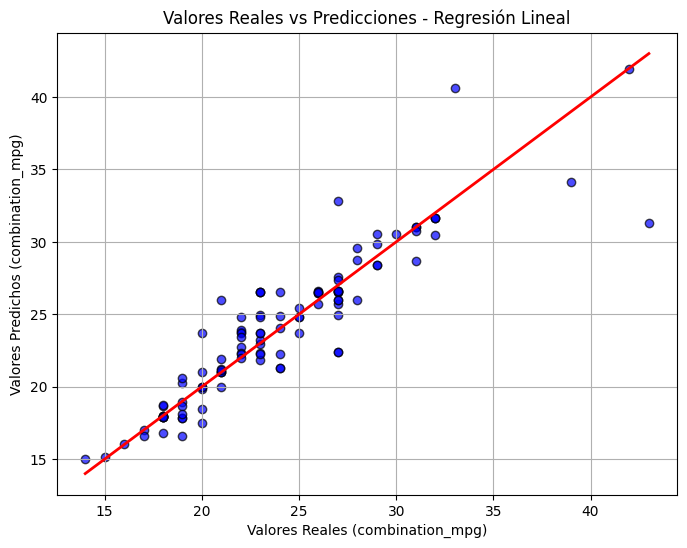

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color ='blue', edgecolor ='k', alpha = 0.7)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', linewidth=2)
plt.xlabel('Valores Reales (combination_mpg)')
plt.ylabel('Valores Predichos (combination_mpg)')
plt.title('Valores Reales vs Predicciones - Regresión Lineal')
plt.grid(True)
plt.show()

### Visualización de la Importancia de las Características en el Modelo de Bosque Aleatorio

Este bloque de código crea un gráfico de barras horizontal que muestra la importancia de cada característica en el modelo de `RandomForestRegressor`:

1. **Visualización de la importancia**: `plt.barh(features, coefficients, ...)` representa la contribución relativa de cada característica en el modelo.
2. **Etiquetas y título**: El eje X indica la "Importancia de la Característica", y el título describe el gráfico como "Importancia de las Características en RandomForestRegressor".

Este gráfico ayuda a identificar qué características tienen mayor influencia en las predicciones del modelo.


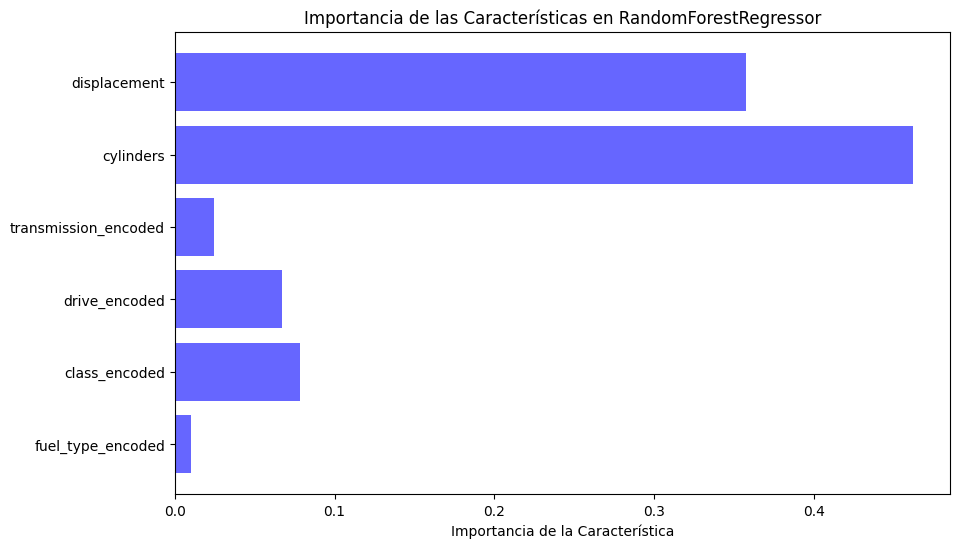

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='blue', alpha=0.6)
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características en RandomForestRegressor')
plt.show()

### Descripción de la siguiente celda:
Esta celda realiza operaciones adicionales de análisis o procesamiento de datos.


In [ ]:
#features = ['fuel_type_encoded', 'class_encoded', 'drive_encoded',
 #          'transmission_encoded', 'cylinders', 'displacement']

features = ['fuel_type_encoded','class_encoded', 'cylinders', 'displacement']
X = car_df_encoded[features]
y = car_df_encoded['combination_mpg']

### Descripción de la siguiente celda:
Esta celda divide los datos en conjuntos de entrenamiento y prueba para la validación del modelo.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Descripción de la siguiente celda:
Esta celda entrena un modelo de regresión lineal con los datos de entrenamiento.


In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

3.7946811248038417

### Descripción de la siguiente celda:
Esta celda evalúa el rendimiento del modelo usando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).


In [ ]:
r2 = r2_score(y_test, y_pred_rf)
r2

0.8585365473413731

### Descripción de la siguiente celda:
Esta celda realiza operaciones adicionales de análisis o procesamiento de datos.


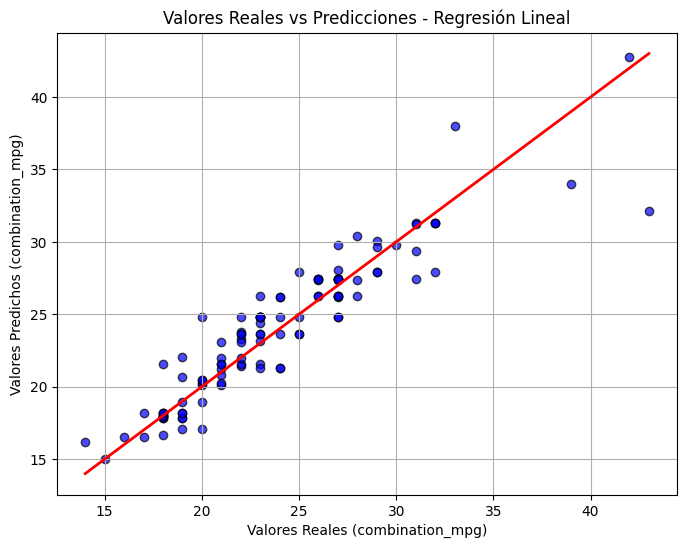

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color ='blue', edgecolor ='k', alpha = 0.7)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', linewidth=2)
plt.xlabel('Valores Reales (combination_mpg)')
plt.ylabel('Valores Predichos (combination_mpg)')
plt.title('Valores Reales vs Predicciones - Regresión Lineal')
plt.grid(True)
plt.show()